In [1]:
# Load & check bike data
import os
import pandas as pd
from IPython.display import displayfghyuiop

import os
print("Working dir:", os.getcwd())
print("Files here:", os.listdir())


# Load the bike reviews CSV
df_bike = pd.read_csv('../data/bike_rental_reviews.csv', encoding='latin-1')


# Confirm shape and look at first rows
print("Bike shape:", df_bike.shape)
display(df_bike.head())





Working dir: /Users/sheilamcgovern/Desktop/Projects2025/incremental_capstone_unit5/notebooks
Files here: ['02_Sentiment_Analysis.ipynb', '.ipynb_checkpoints', '01_Data_Collection_and_Preprocessing.ipynb']
Bike shape: (50000, 2)


,review_text,sentiment
0,"The entire process was easy, and the availabil...",positive
1,Standard rental process. The mobile app was ac...,neutral
2,One of the best bike rentals Iâve had. The m...,positive
3,One of the best bike rentals Iâve had. The c...,positive
4,Not worth the money. The seat comfort was a ma...,negative


In [2]:
# Inspect structure & missingness


print("\n=== BIKE REVIEWS ===")
df_bike.info()
print("\nMissing values per column (bike):")
print(df_bike.isna().sum())



=== BIKE REVIEWS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  50000 non-null  object
 1   sentiment    50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Missing values per column (bike):
review_text    0
sentiment      0
dtype: int64


In [3]:


# Bike dataset
df_bike['review_length'] = df_bike['review_text'].str.len()


print("\nBike review lengths:\n", df_bike['review_length'].describe())




Bike review lengths:
 count    50000.000000
mean        59.912660
std          9.601791
min         37.000000
25%         53.000000
50%         60.000000
75%         67.000000
max         82.000000
Name: review_length, dtype: float64


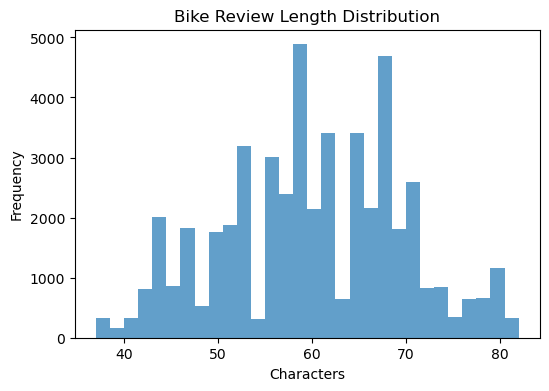

In [4]:
# Plot length distributions
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
plt.hist(df_bike['review_length'], bins=30, alpha=0.7)
plt.title('Bike Review Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()


In [5]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sheilamcgovern/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sheilamcgovern/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sheilamcgovern/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
# Define & apply clean_text()
import re
from nltk.corpus       import stopwords
from nltk.stem         import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = text.split()
    return " ".join(lemmatizer.lemmatize(t) for t in tokens if t not in stop_words)

# Apply to create a new column
df_bike['cleaned_review'] = df_bike['review_text'].astype(str).apply(clean_text)

# Quick sanity‐check
display(df_bike[['review_text','cleaned_review']].head())


,review_text,cleaned_review
0,"The entire process was easy, and the availabil...",entire process easy availability high quality
1,Standard rental process. The mobile app was ac...,standard rental process mobile app acceptable
2,One of the best bike rentals Iâve had. The m...,one best bike rental ive mobile app made even ...
3,One of the best bike rentals Iâve had. The c...,one best bike rental ive customer service made...
4,Not worth the money. The seat comfort was a ma...,worth money seat comfort major letdown


In [6]:

df_bike['cleaned_review'] = df_bike['review_text'].apply(clean_text)

# cleaned output

display(df_bike[['review_text','cleaned_review']].head())

,review_text,cleaned_review
0,"The entire process was easy, and the availabil...",entire process easy availability high quality
1,Standard rental process. The mobile app was ac...,standard rental process mobile app acceptable
2,One of the best bike rentals Iâve had. The m...,one best bike rental ive mobile app made even ...
3,One of the best bike rentals Iâve had. The c...,one best bike rental ive customer service made...
4,Not worth the money. The seat comfort was a ma...,worth money seat comfort major letdown


In [11]:
# TF–IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5_000, 
    ngram_range=(1,1)    # you can experiment with (1,2) later
)
X_reviews = vectorizer.fit_transform(df_bike['cleaned_review'])
y_reviews = df_bike['sentiment']

print("X_reviews shape:", X_reviews.shape)
print("Sample features:", vectorizer.get_feature_names_out()[:10])



X_reviews shape: (50000, 115)
Sample features: ['absolutely' 'acceptable' 'app' 'availability' 'average' 'awful'
 'battery' 'beach' 'best' 'better']


In [12]:
# Save cleaned data & vectorizer
import pickle

with open('../data/df_bike_clean.pkl',    'wb') as f: pickle.dump(df_bike,      f)
with open('../data/X_reviews.pkl',        'wb') as f: pickle.dump(X_reviews,    f)
with open('../data/y_reviews.pkl',        'wb') as f: pickle.dump(y_reviews,    f)
with open('../data/vectorizer.pkl',       'wb') as f: pickle.dump(vectorizer,   f)

print("Saved cleaned data and TF–IDF artifacts to ../data/")



Saved cleaned data and TF–IDF artifacts to ../data/
